## Exercises 2.1

It is recquired to calculate $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ At first. I used a uniform sampling for x in [0,1] and then i I sampled x from Taylor expansion to second and fourth order. I estimated $I$</span> 10000 times, which were diveded in 100 blocks in order to calculate progressive mean values and errors as mean std.

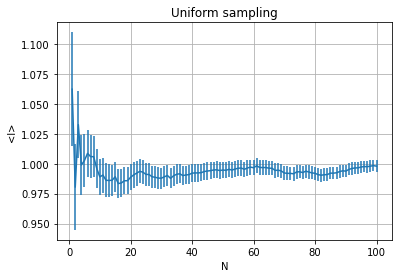

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy as np1
import numpy as np2

plt.title("Uniform sampling")

x= np.loadtxt("Esercizio1/dati_unif.txt",usecols=(0), delimiter=' ',   unpack='true')

f=np1.loadtxt("Esercizio1/dati_unif.txt",usecols=(1), delimiter=' ', unpack='true')

error = np2.loadtxt("Esercizio1/dati_unif.txt", usecols=(2), delimiter=' ', unpack='true')

plt.errorbar(x,f,yerr=error)
plt.xlabel('N_block')
plt.ylabel('<I>')
plt.grid(True)
plt.show()

The estimation of integral converges to 1 and mean std decreases progressivly, as expected by central limit theorem.

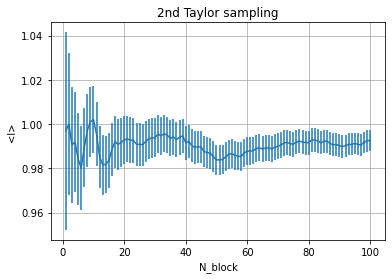

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy as np1
import numpy as np2

plt.title("2nd Taylor sampling")

x= np.loadtxt("Esercizio1/dati_taylor2.txt",usecols=(0), delimiter=' ',   unpack='true')

f=np1.loadtxt("Esercizio1/dati_taylor2.txt",usecols=(1), delimiter=' ', unpack='true')

error = np2.loadtxt("Esercizio1/dati_taylor2.txt", usecols=(2), delimiter=' ', unpack='true')

plt.errorbar(x,f,yerr=error)
plt.xlabel('N_block')
plt.ylabel('<I>')
plt.grid(True)
plt.show()

Sampling with second-order Taylor expansion allows to a faster convergence with less steps then uniform sampling, but errors and mean values are quite the same after lot of extimations. Note that the convergence value is lower than one: this occurs beacause the expansion is a under stimation of the given function.

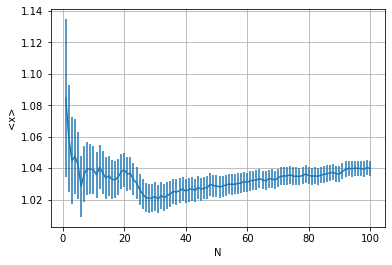

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy as np1
import numpy as np2

x= np.loadtxt("Esercizio1/dati_taylor3.txt",usecols=(0), delimiter=' ',   unpack='true')

f=np1.loadtxt("Esercizio1/dati_taylor3.txt",usecols=(1), delimiter=' ', unpack='true')

error = np2.loadtxt("Esercizio1/dati_taylor3.txt", usecols=(2), delimiter=' ', unpack='true')

plt.errorbar(x,f,yerr=error)
plt.xlabel('N')
plt.ylabel('<x>')
plt.grid(True)
plt.show()

The fourth-order Taylor expansion doesn't converge to 1, but mean std goes to 0: I think fourth-order is not a good sampling becuse it's over stimation of the starter function. Probably, the next order of exstimations allows a better and faster convergence than the second-one.

## Exercise 2.2

In the first part, I simulate descrete random walk on 3 dimension. I divide 10000 simulations in 100 blocks and than I compute the distance mean value for every block and every step. Then, I use this array to compute the final mean value and erorr (mean std) for every step (data blocking).

Data fitting with dispersion occurs an error of[0.00011771]


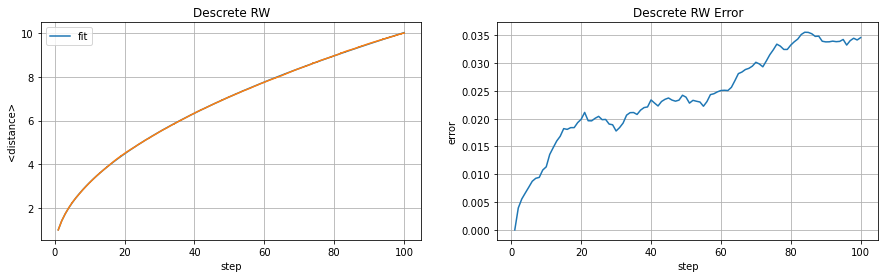

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy as np1
import numpy as np2
import scipy.optimize as opt;

def func(x, k):
     return k * x**(1/2)


f  = plt.figure(figsize=(15,4))
axes1 = plt.subplot(1,2,1)

plt.title("Descrete RW")

x= np.loadtxt("Esercizio2/descrete_RW.txt",usecols=(0), delimiter=' ',   unpack='true')

f=np1.loadtxt("Esercizio2/descrete_RW.txt",usecols=(1), delimiter=' ', unpack='true')

error = np2.loadtxt("Esercizio2/descrete_RW.txt", usecols=(2), delimiter=' ', unpack='true')

optimizedParameters, pcov = opt.curve_fit(func, x, f);
print("Data fitting with dispersion occurs an error of" + str(np.sqrt(np.diag(pcov))))
plt.plot(x, func(x, *optimizedParameters), label="fit");
plt.errorbar(x,f,yerr=error)
plt.xlabel('step')
plt.ylabel('<distance>')
plt.grid(True)
plt.legend()

axes2 = plt.subplot(1,2,2)
plt.title("Descrete RW Error")
plt.errorbar(x,error)
plt.xlabel('step')
plt.ylabel('error')
plt.grid(True)
plt.show()

Distance mean value has a good fitting with a dispersion function like $f(N)=k\sqrt{N}$ and error grows for every step as expected from a randomic walk.

Than, continue RW is simulated sampling uniformly $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$ for computing cartesian components:

Data fitting with dispersion occurs an error of[0.00027712]


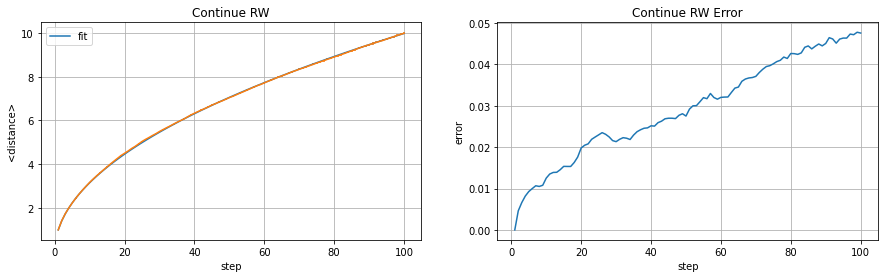

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy as np1
import numpy as np2
import scipy.optimize as opt;

def func(x, k):
     return k * x**(1/2)

f  = plt.figure(figsize=(15,4))
axes1 = plt.subplot(1,2,1)
plt.title("Continue RW")

x= np.loadtxt("Esercizio2/continue_RW.txt",usecols=(0), delimiter=' ',   unpack='true')

f=np1.loadtxt("Esercizio2/continue_RW.txt",usecols=(1), delimiter=' ', unpack='true')

error = np2.loadtxt("Esercizio2/continue_RW.txt", usecols=(2), delimiter=' ', unpack='true')

y_data=f+error
optimizedParameters, pcov = opt.curve_fit(func, x, f);
print("Data fitting with dispersion occurs an error of" + str(np.sqrt(np.diag(pcov))))
plt.plot(x, func(x, *optimizedParameters), label="fit");

plt.errorbar(x,f,yerr=error)
plt.xlabel('step')
plt.ylabel('<distance>')
plt.grid(True)
plt.legend()

axes1 = plt.subplot(1,2,2)
plt.title("Continue RW Error")
plt.errorbar(x,error)
plt.xlabel('step')
plt.ylabel('error')
plt.grid(True)
plt.show()

The errors are higher end fitting is less correct than decrete RW because wa are sampling in the continuum which is more stochastic, but these results are consistent.